<center>  
<h1> Null Hypothesis $H_{0}: \rho=0$ <br>
Alternate Hypothesis $H_{1}: \rho>0$
</h1>
</center>

<center> 
<h1>
$dw=\frac{\sum_{i=2}^{n}\left(e_{i}-e_{i-1}\right)^{2}}{\sum_{i=1}^{n} e_{i}^{2}}$
</h1>
</center>  

<center> 
<h1>
$e_{i}=y_{i}-\hat{y}_{i}$
</h1>
</center>  

<center> 
<h1>
$\begin{array}{ll}{\text { If } dw<d_{L}} & {\text { reject } H_{0}: \rho=0} \\ {\text { If } dw>d_{U}} & {\text { do not reject } H_{0}: \rho=0} \\ {\text { If } d_{L}<dw<d_{U}} & {\text { test is inconclusive. }}\end{array}$
</h1>
</center>  

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as pyplot
from matplotlib import pyplot as plt

from statsmodels.formula.api import ols #ols model - residual calculation
from statsmodels.stats.stattools import durbin_watson #durbin_watson method
import statsmodels.tsa.api as smt #visualizing residuals

-----

## monthly beer production in Austria

In [3]:
df = pd.read_csv("monthly-beer-production-in-austr.csv")

In [4]:
df.isnull().sum()

Month                      0
Monthly beer production    0
dtype: int64

In [5]:
df

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9
...,...,...
471,1995-04,127.0
472,1995-05,151.0
473,1995-06,130.0
474,1995-07,119.0


In [6]:
df.dtypes

Month                       object
Monthly beer production    float64
dtype: object

In [7]:
df['Month'] = pd.to_datetime(df['Month'])

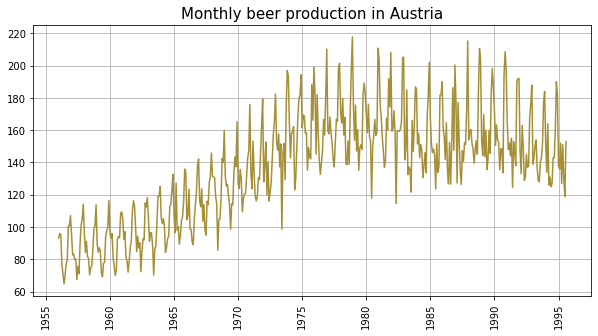

In [8]:
plt.figure(figsize=(10,5))
plt.title("Monthly beer production in Austria", fontsize=15)
plt.plot(df["Month"], df["Monthly beer production"], "-", color='#A69037')
plt.grid()
plt.xticks(rotation=90)
plt.show()

In [9]:
lst = list(range(1,476+1))

production = df["Monthly beer production"].to_list()

new = pd.DataFrame({'time':lst, 'production':production})

In [10]:
def durbin_watson_func(y, X, df, n):
    # y - dependent variable
    # X - independent variables
    # df - dataframe of y and X
    # n - (a number of data points - 1)
    
    #fit multiple linear regression model
    model = ols(formula = f'{y} ~ {X}', data=df).fit()
    
    print('durbin_watson d statistic: ', durbin_watson(model.resid))
    
    acf = smt.graphics.plot_acf(model.resid, lags=n , alpha=0.05)

durbin_watson d statistic:  0.6682376470621262


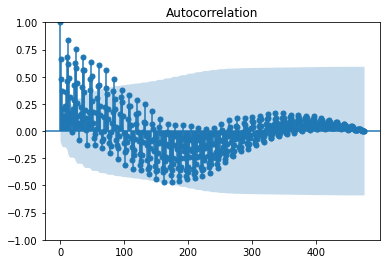

In [11]:
durbin_watson_func('production', 'time', new, len(lst)-1)

k = 1  
n = 476  
dL 1.841  
du 1.850

-- positive auto-correlation

----

## Sales of Shampoo over a Three-Years period

In [12]:
df2 = pd.read_csv("sales-of-shampoo-over-a-three-ye.csv")

In [13]:
df2

,Month,Sales of shampoo over a three year period
0,1-Jan,266.0
1,1-Feb,145.9
2,1-Mar,183.1
3,1-Apr,119.3
4,1-May,180.3
5,1-Jun,168.5
6,1-Jul,231.8
7,1-Aug,224.5
8,1-Sep,192.8
9,1-Oct,122.9


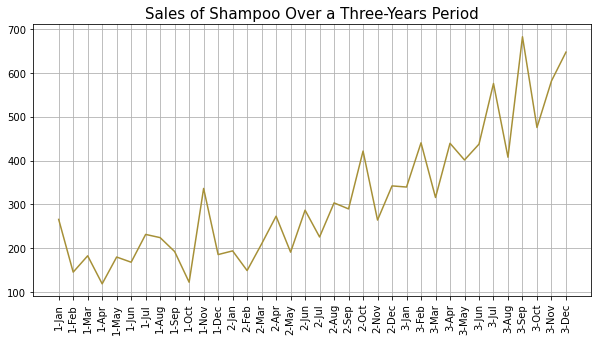

In [14]:
plt.figure(figsize=(10,5))
plt.title("Sales of Shampoo Over a Three-Years Period", fontsize=15)
plt.plot(df2["Month"], df2["Sales of shampoo over a three year period"], "-", color='#A69037')
plt.grid()
plt.xticks(rotation=90)
plt.show()

In [15]:
lst2 = list(range(1,36+1))

sales = df2["Sales of shampoo over a three year period"].to_list()

new2 = pd.DataFrame({'time':lst2, 'sales':sales})

durbin_watson d statistic:  1.9372827260699401


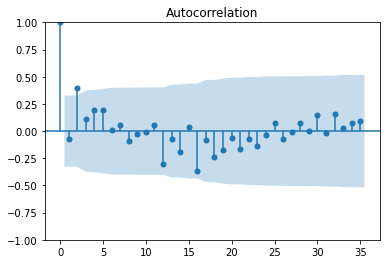

In [16]:
durbin_watson_func('sales', 'time', new2, len(lst2)-1)

k = 1
n = 36
1.411
1.525

-> no evidence of autocorrelation

- less data points
- can't guess a residual of particular point is especially correlated with the residual of the nearest point

-------


## Electric Production

In [17]:
df3 = pd.read_csv("Electric_Production.csv")

In [18]:
df3

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151
...,...,...
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212


In [19]:
df3['DATE'] = pd.to_datetime(df3['DATE'])

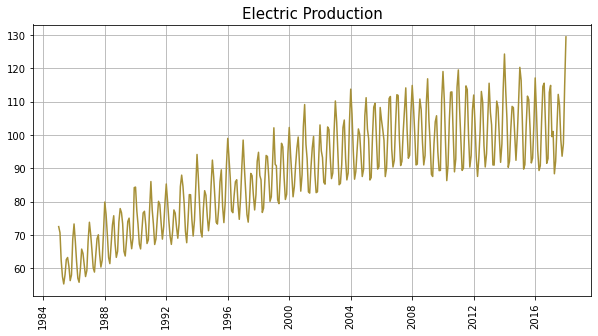

In [20]:
plt.figure(figsize=(10,5))
plt.title("Electric Production", fontsize=15)
plt.plot(df3["DATE"], df3["IPG2211A2N"], "-", color='#A69037')
plt.grid()
plt.xticks(rotation=90)
plt.show()

In [21]:
lst3 = list(range(1,397+1))

electricity = df3["IPG2211A2N"].to_list()

new3 = pd.DataFrame({'time':lst3, 'electricity':electricity})

durbin_watson d statistic:  0.8314756578899859


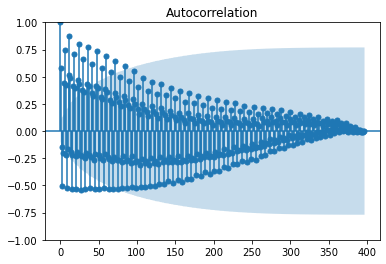

In [22]:
durbin_watson_func('electricity', 'time', new3, len(lst3)-1)

k = 1
n = 397
dL = 1.831
du = 1.841

-- positive auto-correlation